<a href="https://colab.research.google.com/github/Ron-Wu/Machine-learning-0602/blob/main/0720_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
cal_database = {
    0:['包子','300','baozi'], 1:['漢堡','250','buger'], 2:['蛋餅','280','danbing'],
    3:['飲料','500','drinks'], 4:['飯糰','400','fantuan'], 5:['鍋貼','50','guotie'],
    6:['燒餅','170','shaobing'], 7:['吐司','345','sliced_bread'], 8:['饅頭','175','steamed_bread'],
    9:['御飯糰','150','triangle_riceball'], 10:['小籠包','45','xiaolongbao'], 11:['油條','100','you_tiao']
}

In [17]:
f = open("1.txt")
data = f.read().splitlines()
# print(data)
# print(type(data))
name_set = set()
for i in data:
  index = int(i.split(" ")[0])
  # print(index)
  name_set.add(cal_database[index][0])
print(name_set)

{'飲料', '小籠包', '吐司'}


In [30]:
str_f = ""
name_list = list(name_set)
print(name_list)
for i in range(len(cal_database)):
  for j in  name_list:
    if j == cal_database[i][0]:
      print(f"{cal_database[i][0]}的熱量為{cal_database[i][1]}大卡")
    else:
      pass

str_f = ""
for i in range(len(list(name_list))):
  if i < len(name_list)-1:
    str_f += f'{name_list[i]},'
  else:
    str_f += f"{name_list[i]}"
print(str_f)

['飲料', '小籠包', '吐司']
飲料的熱量為500大卡
吐司的熱量為345大卡
小籠包的熱量為45大卡
飲料,小籠包,吐司


In [24]:
# 詢問用戶品項
str_f = ""
for i in range(len(list(set_l))):
  if i < len(list(set_l))-1:
    # print(cal_database[list(set_l)[i]][0])
    str_f += f"{cal_database[list(set_l)[i]][0]},"
  else:
    str_f += f"{cal_database[list(set_l)[i]][0]}"
# print(str_f)

print(f'你的餐點是"{str_f}"是嗎')
print(f'請照順序輸入份數，例：若三份，一份，請輸入：3,1')

NameError: ignored

In [6]:
# 詢問份數 假設回傳 4,4
food_count_s = "0.5/2/3"
food_count_l = food_count_s.split("/")
print(food_count_l)

total_cal = 0
for i in range(len(list(set_l))):
  print(f"{cal_database[list(set_l)[i]][0]}熱量：{cal_database[list(set_l)[i]][1]}")
  total_cal += float(food_count_l[i])*float(cal_database[list(set_l)[i]][1])

print(total_cal)

['0.5', '2', '3']
漢堡熱量：250
蛋餅熱量：280
飲料熱量：500
2185.0


In [7]:
# 文字熱量
cal_dataset = {"麵包":"300", "漢堡":"500"}
user_input = "牛肉漢堡"
c_l = cal_dataset.keys()
print(type(c_l))
print(c_l)

for i in c_l:
  if i in user_input:
    print(i)

print(f'{user_input}的熱量約{cal_dataset[i]}大卡')

<class 'dict_keys'>
dict_keys(['麵包', '漢堡'])
漢堡
牛肉漢堡的熱量約500大卡


--------------------------------------------------------------------------

--------------------------------------------------------------------------

In [1]:
!unzip "封存.zip"

Archive:  封存.zip
   creating: 2021-07-14/
  inflating: 2021-07-14/daily_total.txt  
  inflating: __MACOSX/2021-07-14/._daily_total.txt  
   creating: 2021-07-15/
  inflating: 2021-07-15/daily_total.txt  
  inflating: __MACOSX/2021-07-15/._daily_total.txt  
   creating: 2021-07-16/
  inflating: 2021-07-16/daily_total.txt  
  inflating: __MACOSX/2021-07-16/._daily_total.txt  
   creating: 2021-07-17/
  inflating: 2021-07-17/daily_total.txt  
  inflating: __MACOSX/2021-07-17/._daily_total.txt  
   creating: 2021-07-18/
  inflating: 2021-07-18/daily_total.txt  
  inflating: __MACOSX/2021-07-18/._daily_total.txt  
  inflating: date_tdee.txt           
  inflating: __MACOSX/._date_tdee.txt  
  inflating: input_date.txt          
  inflating: __MACOSX/._input_date.txt  


In [2]:
# 取出“所有”更新過TDEE的日期 放入 tdee_input_date列表
# 將對應的日期與TDEE 放入 date_tdee_value字典
f = open("date_tdee.txt")
data = f.read().splitlines()
print(data)

date_tdee_value = {}
tdee_input_date =[]

for i in data:
  tdee_input_date.append(i.split(",")[0])
  date_tdee_value[i.split(",")[0]] = i.split(",")[1]
date1 = tdee_input_date[-2]
date2 = tdee_input_date[-1]
# print(date1, date2)

print(f"tdee_input_date列表: {tdee_input_date}")
print(f"date_tdee_value字典: {date_tdee_value}") # 字典=> TDEE輸入日期：TDEE

['2021-06-01,2000', '2021-07-01,2500', '2021-07-16,3000']
tdee_input_date列表: ['2021-06-01', '2021-07-01', '2021-07-16']
date_tdee_value字典: {'2021-06-01': '2000', '2021-07-01': '2500', '2021-07-16': '3000'}


In [3]:
# 可以取出兩個日期之間的其他日期，包含“最尾的日期”
def count_window(datex, datey):
  # 取出用戶選取的區間日期
  import time  # 引入time
  def rm0(r):
      timeString = r  # 時間格式為字串
      struct_time = time.strptime(timeString, "%Y-%m-%d")  # 轉成時間元組
      time_stamp = int(time.mktime(struct_time))  # 轉成時間戳
      # print(time_stamp)
      date = time.strftime('%Y-%-m-%-d', time.localtime(time_stamp))
      return date
  rmx = rm0(datex)
  rmy = rm0(datey)
  x_l = rmx.split("-")
  y_l = rmy.split("-")
  # print("x_l:", x_l)
  # print("y_l:", y_l)
  import datetime
  a = datetime.date(int(x_l[0]), int(x_l[1]), int(x_l[2]))
  b = datetime.date(int(y_l[0]), int(y_l[1]), int(y_l[2]))
  user_choose_total = []
  print(a.toordinal(), b.toordinal())
  for i in range(a.toordinal(), b.toordinal()):
      # print(str(datetime.date.fromordinal(i)))
      user_choose_total.append(str(datetime.date.fromordinal(i)))
  user_choose_total.append(user_choose2)
  return user_choose_total

In [4]:
user_choose1 = "0001-07-13"
user_choose2 = "2021-07-18"
  # 取出用戶選取的區間日期
import time  # 引入time
def rm0(r):
    timeString = r  # 時間格式為字串
    struct_time = time.strptime(timeString, "%Y-%m-%d")  # 轉成時間元組
    time_stamp = int(time.mktime(struct_time))  # 轉成時間戳
    # print(time_stamp)
    date = time.strftime('%Y-%-m-%-d', time.localtime(time_stamp))
    return date
rmx = rm0(user_choose1)
rmy = rm0(user_choose2)
x_l = rmx.split("-")
y_l = rmy.split("-")
# print("x_l:", x_l)
# print("y_l:", y_l)
import datetime
a = datetime.date(int(x_l[0]), int(x_l[1]), int(x_l[2]))
b = datetime.date(int(y_l[0]), int(y_l[1]), int(y_l[2]))
user_choose_total = []
print(a,b)

print(a.toordinal(), b.toordinal())
print(type(a.toordinal()))
for i in range(a.toordinal(), b.toordinal()):
    # print(str(datetime.date.fromordinal(i)))
    user_choose_total.append(str(datetime.date.fromordinal(i)))
user_choose_total.append(user_choose2)
print(user_choose_total)

0001-07-13 2021-07-18
194 737989
<class 'int'>


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
# 計算用戶選取的日期區間
user_choose1 = "2021-07-13"
user_choose2 = "2021-07-19"
user_choose_list = count_window(user_choose1, user_choose2)
print(user_choose_list)

737984 737990
['2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18', '2021-07-19']


In [6]:
# 看 tdee_input_date(輸入過TDEE的日期) 的哪天在 user_choose_list(用戶選取區間)裡
tdee_count = []
for i in tdee_input_date:
  if i in user_choose_list:
    tdee_count.append(i)
print(f"包含到的日子有：{tdee_count}")

## 如果剛好沒有框到輸入TDEE的日期，
## 用迴圈確定使用者標註的第一天是否在某兩個輸入TDEE的區間，若是則取輸入TDEE的前者
if len(tdee_count) == 0:
  for i in range(len(tdee_input_date)-1):
    bb = count_window(tdee_input_date[i], tdee_input_date[i+1]) 
    # print(bb)
    if user_choose_list[0] in bb:
      print(tdee_input_date[i])

  tdee_value = date_tdee_value[tdee_input_date[i]]
  print(tdee_value)

  tdee_choose_date = {}
  tdee_choose_date[tdee_input_date[i]]=user_choose_list
  print(tdee_choose_date)

  tdee_count.append(tdee_input_date[i])
  print(f"tdee_count新增後: {tdee_count}")

# 如果只有一天，需取 “前一次輸入TDEE的時間“
# date_tdee_value字典: {'2021-06-01': '2000', '2021-07-01': '2500', '2021-07-16': '3000'}
elif len(tdee_count) == 1:
  
  # print(tdee_input_date.index(tdee_count[0]))

  tdee_index = user_choose_list.index(tdee_count[0]) #  包含到的日期的index

  user_choose_list1 = user_choose_list[:tdee_index] # 已包含到的日期去做分界
  print(f"前區間: {user_choose_list1}")
  
  print(f'tdee_count新增前: {tdee_count}')
  tdee_count.insert(0,tdee_input_date[tdee_input_date.index(tdee_count[0])-1]) # 把前一個輸入TDEE的日期 插入第0位
  print(f'tdee_count新增後: {tdee_count}')

  user_choose_list2 = user_choose_list[tdee_index:] # 已包含到的日期去做分界
  print(f"後區間: {user_choose_list2}")
  
  tdee_choose_date = {}
  tdee_choose_date[tdee_count[0]] = user_choose_list1 # 將 前一個輸入TDEE的日期：前區間 寫入字典 tdee_choose_date
  tdee_choose_date[tdee_count[1]] = user_choose_list2 # 將 有被包含到的TDEE的日期：後區間 寫入字典 tdee_choose_date
  print(tdee_choose_date)

  # date_tdee_value字典: {'2021-06-01': '2000', '2021-07-01': '2500', '2021-07-16': '3000'}
  # tdee_input_date列表: ['2021-06-01', '2021-07-01', '2021-07-16']

包含到的日子有：['2021-07-16']
前區間: ['2021-07-13', '2021-07-14', '2021-07-15']
tdee_count新增前: ['2021-07-16']
tdee_count新增後: ['2021-07-01', '2021-07-16']
後區間: ['2021-07-16', '2021-07-17', '2021-07-18', '2021-07-19']
{'2021-07-01': ['2021-07-13', '2021-07-14', '2021-07-15'], '2021-07-16': ['2021-07-16', '2021-07-17', '2021-07-18', '2021-07-19']}


In [7]:
ussr_choose_list_1 = []
user_input_record_date = []
user_TDEE = []
for i in tdee_count:
  if i in tdee_choose_date.keys():
    # print(tdee_choose_date[i])
    # print(i)   

    for j in range(len(tdee_choose_date[i])):
      try:
        f = open(f"/content/{tdee_choose_date[i][j]}/daily_total.txt")
        data = f.read().splitlines()
        # print(tdee_choose_date[i][j])
        user_input_record_date.append(tdee_choose_date[i][j])
        # print(f"data: {data}")
        # print(type(data))
        # print("-"*30)
        
        # date_tdee_value字典: {'2021-06-01': '2000', '2021-07-01': '2500', '2021-07-16': '3000'}     
        user_TDEE.append(date_tdee_value[i])

        ## 計算一天總熱量
        total = 0
        for k in data:
          total += float(k)
        ussr_choose_list_1.append(total)
          # print(f"紀錄完成: {ussr_choose_list_1}")
          # print("-"*30)
      except:
        pass
  ussr_choose_list_1=ussr_choose_list_1
print(f"使用者輸入日期對應的單日總熱量：{ussr_choose_list_1}")
print(f"使用者有紀錄的輸入日期：{user_input_record_date}")
print(f"使用者在同樣順序的日期時的TDEE：{user_TDEE}")

difference_cal_TDEE = []
for i in range(len(ussr_choose_list_1)):
  dif_value = float(ussr_choose_list_1[i]-float(user_TDEE[i]))
  difference_cal_TDEE.append(dif_value)
print(difference_cal_TDEE)

使用者輸入日期對應的單日總熱量：[1400.0, 1500.0, 1600.0, 1700.0, 1800.0]
使用者有紀錄的輸入日期：['2021-07-14', '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18']
使用者在同樣順序的日期時的TDEE：['2500', '2500', '3000', '3000', '3000']
[-1100.0, -1000.0, -1400.0, -1300.0, -1200.0]


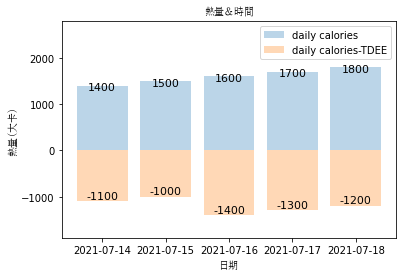

In [38]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# 柱狀圖
plt.bar(user_input_record_date, ussr_choose_list_1, label='daily calories', align="center", alpha=0.3)
# plt.plot(user_input_record_date, ussr_choose_list_1, label='daily calories', align="center", alpha=0.3)
# plt.scatter(user_input_record_date, ussr_choose_list_1, label='daily calories', align="center", alpha=0.3)
for a, b in zip(user_input_record_date,ussr_choose_list_1):  
 plt.text(a, b-100, int(b), ha='center',fontsize=11)
#  plt.text(a, b+50, '%.0f' % b, ha='center',fontsize=11)

plt.bar(user_input_record_date, difference_cal_TDEE, label='daily calories-TDEE', align="center", alpha=0.3)
for a,b in zip(user_input_record_date,difference_cal_TDEE):  
 plt.text(a, b+50, int(b), ha='center',fontsize=11)

font = FontProperties(fname=r"simsun.ttc")

plt.xlabel("日期", fontproperties = font)  #设置X轴Y轴名称  
plt.ylabel("熱量(大卡)", fontproperties = font )  
plt.title("熱量＆時間", fontproperties = font)

ymax = max(ussr_choose_list_1)+1000
ymin = min(difference_cal_TDEE)-500

plt.ylim([ymin, ymax])

plt.legend()
# 先存圖
plt.savefig('./123.jpg')
# 貼出圖
plt.show()